<a href="https://colab.research.google.com/github/antahiap/dsr-nlp/blob/main/notebooks/03_gensim_MAT_lsdyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Gensim to create word embeddings for LSDYNA MAnual


In [55]:
# Install wget (if not already installed)
!apt-get -qq install wget

# Download a specific file from the GitHub repository
!wget "https://github.com/antahiap/dsr-nlp/raw/main/data/lsdyna_ii_r13.txt"


--2023-08-09 11:17:32--  https://github.com/antahiap/dsr-nlp/raw/main/data/lsdyna_ii_r13.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/antahiap/dsr-nlp/main/data/lsdyna_ii_r13.txt [following]
--2023-08-09 11:17:32--  https://raw.githubusercontent.com/antahiap/dsr-nlp/main/data/lsdyna_ii_r13.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3098482 (3.0M) [text/plain]
Saving to: ‘lsdyna_ii_r13.txt.1’

lsdyna_ii_r13.txt.1 100%[===================>]   2.95M  --.-KB/s    in 0.03s   

2023-08-09 11:17:33 (97.2 MB/s) - ‘lsdyna_ii_r13.txt.1’ saved [3098482/3098482]



In [56]:
!ls

lsdyna_ii_r13.txt  lsdyna_ii_r13.txt.1	__pycache__  sample_data  word_list.py


## Import all necessary modules.

In [57]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Train Gensim.

Here we feed all the text data into Gensim to train Word2Vec.

- [Gensim homepage](https://radimrehurek.com/gensim/).
- [Wikipedia: Word2Vec](https://en.wikipedia.org/wiki/Word2vec).

In [58]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} files")

        for file in files:
            print(file)
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [59]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=600,
    window=20,
    min_count=1,
    workers=multiprocessing.cpu_count()
)

print("Done.")

Found 1 files
lsdyna_ii_r13.txt
Got 57424 lines.
Done.


## Find most similar words.

With vectors it is easy to find the nearest neighbours.

Note: Feel free to experiment with your own words.

In [60]:
# Access the vocabulary
vocabulary = model.wv.key_to_index

# Print the vocabulary
count = 0
for word in vocabulary:
    print(word)
    count += 1
    if count > 10: break


the
is
of
cst
and
for
in
to
card
strain
variable


## Plot word similarities.

That was just one word. Let us generate a similarity matrix of a lot of words. Again, use your own.

In [61]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")


In [62]:
!wget "https://github.com/antahiap/dsr-nlp/raw/main/data/word_list.py"

--2023-08-09 11:18:22--  https://github.com/antahiap/dsr-nlp/raw/main/data/word_list.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/antahiap/dsr-nlp/main/data/word_list.py [following]
--2023-08-09 11:18:22--  https://raw.githubusercontent.com/antahiap/dsr-nlp/main/data/word_list.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120500 (118K) [text/plain]
Saving to: ‘word_list.py.1’

word_list.py.1      100%[===================>] 117.68K  --.-KB/s    in 0.007s  

2023-08-09 11:18:22 (15.8 MB/s) - ‘word_list.py.1’ saved [120500/120500]



In [63]:
from word_list import word_list_MAT

unique_list = list(set(word_list_MAT))

for w in unique_list:
  if not w in vocabulary:
    unique_list.remove(w)

print(len(unique_list))

381


In [64]:
test = model.wv['element']

In [65]:
for w in unique_list:
  try:
    print(model.wv[w])
  except:
    break
    # unique_list.remove(w)

print(len(unique_list))


381


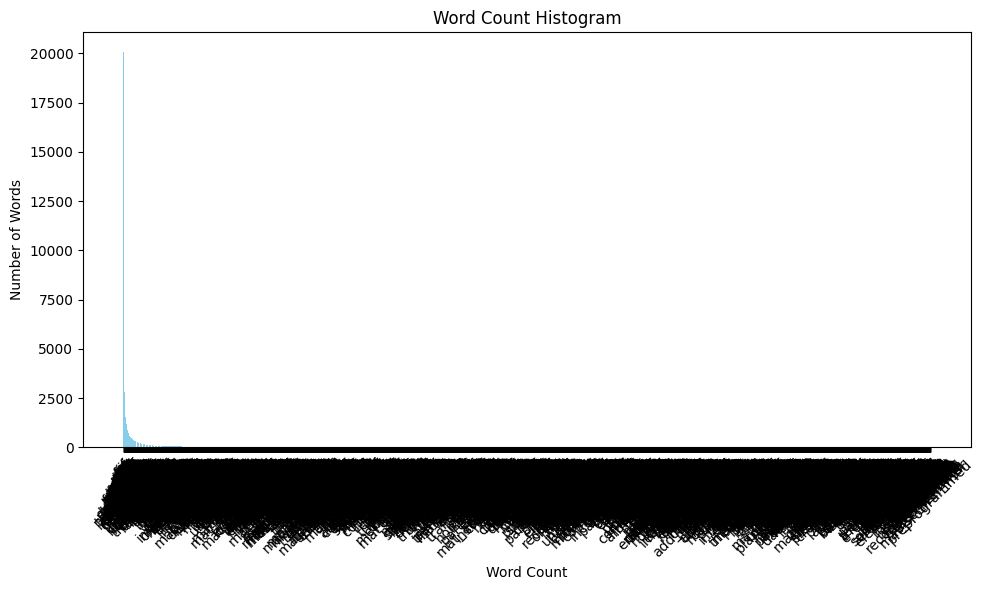

In [84]:
vocab_len = len(model.wv)

word_counts = {
    word: model.wv.get_vecattr(word, "count")
    for word in model.wv.key_to_index
    }

# Extract values from the dictionary
values = list(word_counts.values())
keys = list(word_counts.keys())

# Create a histogram plot
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Number of Words')
plt.title('Word Count Histogram')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [66]:
test = "MAT_BARLAT_YLD2000"
test = 'MAT_039'
model.wv.most_similar(test, topn=1)

KeyError: ignored

In [ ]:
plot_similarities(unique_list[:10])

# Thank you!